In [1]:
from numpy import unique
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import f_regression, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix)
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
#import scikitplot as skplt
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import ensemble, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# 讀取 training data 並過濾 NA 欄位
df = pd.read_csv("heart.csv")#,index_col=0)
df.head()
print(df.shape)

# drop na
df = df.dropna()
print(df.shape)

df.head()
df_bind1 = df[['HeartDisease']] ## 記錄答案 # answer
df_bind1 = df_bind1.dropna()
print(df_bind1.shape)

# ## Training set 的 feature column names
feature_names = list(df.columns)
print(feature_names)

df.head()

(918, 12)
(918, 12)
(918, 1)
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df_dummies = pd.get_dummies(df[['Sex','RestingECG','ExerciseAngina','ST_Slope']])
df_dummies.head()

,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,1,0,0,0,1
1,1,0,0,1,0,1,0,0,1,0
2,0,1,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,1,0,1,0
4,0,1,0,1,0,1,0,0,0,1


In [4]:
df = df.drop(['Sex','RestingECG','ExerciseAngina','ST_Slope'],axis=1)
df.shape

(918, 8)

In [5]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,ATA,140,289,0,172,0.0,0
1,49,NAP,160,180,0,156,1.0,1
2,37,ATA,130,283,0,98,0.0,0
3,48,ASY,138,214,0,108,1.5,1
4,54,NAP,150,195,0,122,0.0,0


In [6]:
for i in df_dummies.columns:
    df[i] = df_dummies[i]
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,ATA,140,289,0,172,0.0,0,0,1,0,1,0,1,0,0,0,1
1,49,NAP,160,180,0,156,1.0,1,1,0,0,1,0,1,0,0,1,0
2,37,ATA,130,283,0,98,0.0,0,0,1,0,0,1,1,0,0,0,1
3,48,ASY,138,214,0,108,1.5,1,1,0,0,1,0,0,1,0,1,0
4,54,NAP,150,195,0,122,0.0,0,0,1,0,1,0,1,0,0,0,1


In [7]:
class_le = LabelEncoder()
df['ChestPainType'] = LabelEncoder().fit_transform(df['ChestPainType'].values)
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,0,1,0,1,0,1,0,0,0,1
1,49,2,160,180,0,156,1.0,1,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,1,0,0,1,0,1,0
4,54,2,150,195,0,122,0.0,0,0,1,0,1,0,1,0,0,0,1


In [8]:
set(df['ChestPainType'])

{0, 1, 2, 3}

In [9]:
train_features = set(df.columns)
df_train = df
print(df_train.shape)

(918, 18)


In [11]:
df_train = df_train.drop("HeartDisease",axis = 1)
df_train.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,1,0,1,0,0,0,1
1,49,2,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,1,0,0,1,0,1,0
4,54,2,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [12]:
X = df_train
y = df_bind1['HeartDisease']
print(X.shape)
print(y.shape)

(918, 17)
(918,)


# Feature Selection

In [13]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
status = model.get_support()
features = np.array(X.columns)
lasso_features = features[status]
print("Selected features:")
print(lasso_features)
df_train_lasso = model.transform(X)
print(df_train_lasso.shape)
print(len(lasso_features))

Selected features:
['Age' 'ChestPainType' 'RestingBP' 'Cholesterol' 'MaxHR' 'Oldpeak' 'Sex_M'
 'ExerciseAngina_Y' 'ST_Slope_Flat' 'ST_Slope_Up']
(918, 10)
10


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning:

X has feature names, but SelectFromModel was fitted without feature names



In [14]:
# Standardization
scaler = StandardScaler()
df_train_lasso = scaler.fit_transform(df_train_lasso)
print(df_train_lasso.shape)

(918, 10)


# Model Training

In [15]:
train_data = df_train_lasso

### RandomForest Classifier

[0.82065217 0.72282609 0.79891304 0.77595628 0.70491803]
[0.76630435 0.77173913 0.78804348 0.75409836 0.67759563]
[0.8423913  0.7826087  0.82065217 0.81420765 0.68852459]
[0.85869565 0.79347826 0.83695652 0.78688525 0.72131148]
[0.86413043 0.81521739 0.83152174 0.80327869 0.71584699]
score of cross validation everytime:  [0.7646531242575434, 0.7515561891185555, 0.7896768828700403, 0.7994654312188169, 0.8059990496555001]
max score of cross validation everytime:  0.8059990496555001
Accuracy_score: 0.8369565217391305
classification_report 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        50
           1       0.78      0.90      0.84        42

    accuracy                           0.84        92
   macro avg       0.84      0.84      0.84        92
weighted avg       0.85      0.84      0.84        92


conf_matrix


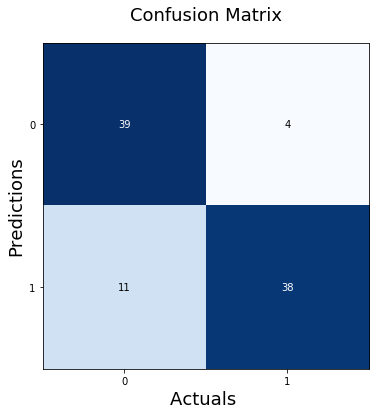

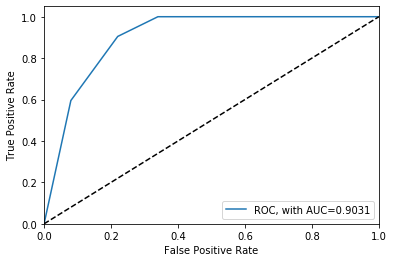

In [16]:
# 建立訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(train_data, y, test_size = 0.1)

score = []
time = []
# 建立 random forest 模型
for i in range(1,6):
    time.append(i)
    forest = ensemble.RandomForestClassifier(n_estimators = i)
    forest_fit = forest.fit(train_X, train_y)
    # 預測
    test_y_predicted = forest.predict(test_X)
    # 績效
    scores = cross_val_score(forest,X,y,cv=5,scoring='accuracy')
    print(scores)
    sum = 0
    for j in scores:
        sum += j
    score.append(sum/5)

print("score of cross validation everytime: ",score)
print("max score of cross validation everytime: ",max(score))


forest = ensemble.RandomForestClassifier(n_estimators = 4)
forest_fit = forest.fit(train_X, train_y)
## test data 評估模型績效
y_pred = forest.predict(test_X)
print("Accuracy_score:", accuracy_score(test_y, y_pred))
print("classification_report \n", classification_report(test_y, y_pred))
print()

## plot confusion matrix
conf_matrix = confusion_matrix(y_pred, test_y)
print("conf_matrix")
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Actuals ', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

#predicted probability
y_pred_proba = forest.predict_proba(test_X)[::,1]
#plot ROC curve
fpr, tpr, _ = roc_curve(test_y,  y_pred_proba)
auc = np.round(roc_auc_score(test_y, y_pred_proba),4)
plt.plot(fpr,tpr,label="ROC, with AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [17]:
forest

RandomForestClassifier(n_estimators=4)

### XGBoost Classifier

[0.90217391 0.84782609 0.80434783 0.79234973 0.72131148]
[0.90217391 0.84782609 0.79891304 0.78142077 0.72131148]
[0.90217391 0.8423913  0.80434783 0.83060109 0.72131148]
[0.90217391 0.84782609 0.80434783 0.83060109 0.72131148]
[0.90217391 0.8423913  0.80434783 0.82513661 0.72131148]
score of cross validation everytime:  [0.8136018056545498, 0.8103290567830838, 0.8201651223568543, 0.8212520788785935, 0.8190722261819909]
max score of cross validation everytime:  0.8212520788785935
Accuracy_score: 0.8478260869565217
classification_report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.83      0.90      0.86        48

    accuracy                           0.85        92
   macro avg       0.85      0.85      0.85        92
weighted avg       0.85      0.85      0.85        92


conf_matrix


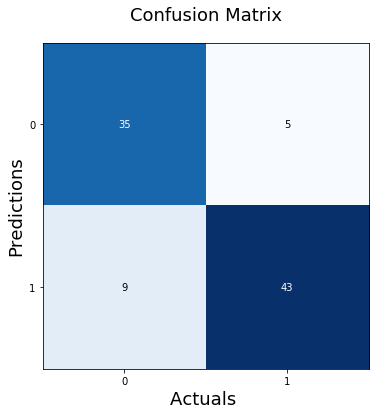

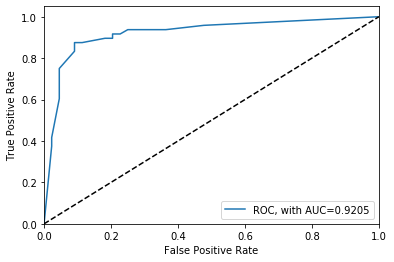

In [18]:
import xgboost as xgb

# 建立訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(train_data, y, test_size = 0.1)

score = []
time = []
# 建立 random forest 模型
for i in range(1,6):
    time.append(i)
    XGB = xgb.XGBClassifier(n_estimators = i)
    forest_fit = XGB.fit(train_X, train_y)
    # 預測
    test_y_predicted = XGB.predict(test_X)
    # 績效
    scores = cross_val_score(XGB,X,y,cv=5,scoring='accuracy')
    print(scores)
    sum = 0
    for j in scores:
        sum += j
    score.append(sum/5)

print("score of cross validation everytime: ",score)
print("max score of cross validation everytime: ",max(score))

## test data 評估模型績效
y_pred = XGB.predict(test_X)
print("Accuracy_score:", accuracy_score(test_y, y_pred))
print("classification_report \n", classification_report(test_y, y_pred))
print()

## plot confusion matrix
conf_matrix = confusion_matrix(y_pred, test_y)
print("conf_matrix")
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Actuals ', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

#predicted probability
y_pred_proba = XGB.predict_proba(test_X)[::,1]
#plot ROC curve
fpr, tpr, _ = roc_curve(test_y,  y_pred_proba)
auc = np.round(roc_auc_score(test_y, y_pred_proba),4)
plt.plot(fpr,tpr,label="ROC, with AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [19]:
XGB

XGBClassifier(n_estimators=5)

### 

# No Feature Selection

## RandomForest Classifier

In [20]:
train_data = df_train

[0.76086957 0.76086957 0.76630435 0.7704918  0.66120219]
[0.79891304 0.74456522 0.82065217 0.73224044 0.64480874]
[0.875      0.78804348 0.82065217 0.7704918  0.70491803]
[0.82065217 0.75543478 0.79891304 0.80327869 0.67759563]
[0.89130435 0.80978261 0.79891304 0.81420765 0.72677596]
score of cross validation everytime:  [0.7439474934663816, 0.7482359230220954, 0.7918210976478974, 0.771174863387978, 0.8081967213114755]
max score of cross validation everytime:  0.8081967213114755
Accuracy_score: 0.7717391304347826
classification_report 
               precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.79        51

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92


conf_matrix


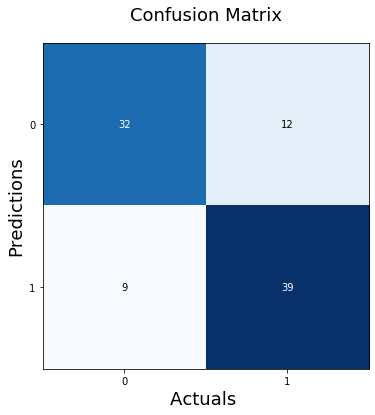

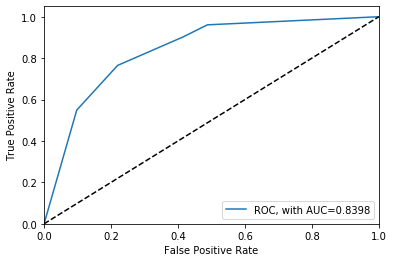

In [21]:
# 建立訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(train_data, y, test_size = 0.1)

score = []
time = []
# 建立 random forest 模型
for i in range(1,6):
    time.append(i)
    forest = ensemble.RandomForestClassifier(n_estimators = i)
    forest_fit = forest.fit(train_X, train_y)
    # 預測
    test_y_predicted = forest.predict(test_X)
    # 績效
    scores = cross_val_score(forest,X,y,cv=5,scoring='accuracy')
    print(scores)
    sum = 0
    for j in scores:
        sum += j
    score.append(sum/5)

print("score of cross validation everytime: ",score)
print("max score of cross validation everytime: ",max(score))


forest = ensemble.RandomForestClassifier(n_estimators = 4)
forest_fit = forest.fit(train_X, train_y)
## test data 評估模型績效
y_pred = forest.predict(test_X)
print("Accuracy_score:", accuracy_score(test_y, y_pred))
print("classification_report \n", classification_report(test_y, y_pred))
print()

## plot confusion matrix
conf_matrix = confusion_matrix(y_pred, test_y)
print("conf_matrix")
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Actuals ', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

#predicted probability
y_pred_proba = forest.predict_proba(test_X)[::,1]
#plot ROC curve
fpr, tpr, _ = roc_curve(test_y,  y_pred_proba)
auc = np.round(roc_auc_score(test_y, y_pred_proba),4)
plt.plot(fpr,tpr,label="ROC, with AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

[0.90217391 0.84782609 0.80434783 0.79234973 0.72131148]
[0.90217391 0.84782609 0.79891304 0.78142077 0.72131148]
[0.90217391 0.8423913  0.80434783 0.83060109 0.72131148]
[0.90217391 0.84782609 0.80434783 0.83060109 0.72131148]
[0.90217391 0.8423913  0.80434783 0.82513661 0.72131148]
score of cross validation everytime:  [0.8136018056545498, 0.8103290567830838, 0.8201651223568543, 0.8212520788785935, 0.8190722261819909]
max score of cross validation everytime:  0.8212520788785935
Accuracy_score: 0.8586956521739131
classification_report 
               precision    recall  f1-score   support

           0       0.94      0.74      0.83        43
           1       0.81      0.96      0.88        49

    accuracy                           0.86        92
   macro avg       0.88      0.85      0.85        92
weighted avg       0.87      0.86      0.86        92


conf_matrix


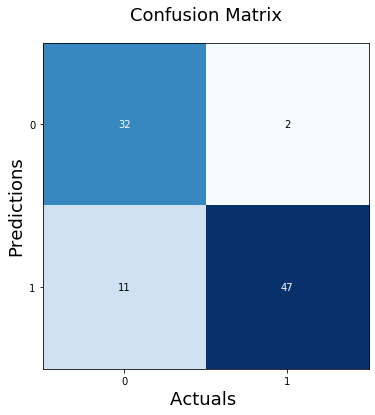

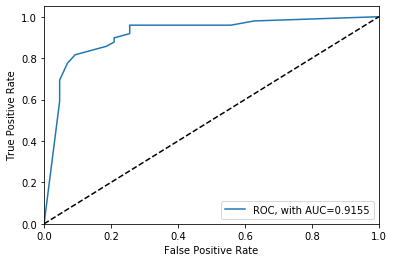

In [22]:
import xgboost as xgb

# 建立訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(train_data, y, test_size = 0.1)

score = []
time = []
# 建立 random forest 模型
for i in range(1,6):
    time.append(i)
    XGB = xgb.XGBClassifier(n_estimators = i)
    forest_fit = XGB.fit(train_X, train_y)
    # 預測
    test_y_predicted = XGB.predict(test_X)
    # 績效
    scores = cross_val_score(XGB,X,y,cv=5,scoring='accuracy')
    print(scores)
    sum = 0
    for j in scores:
        sum += j
    score.append(sum/5)

print("score of cross validation everytime: ",score)
print("max score of cross validation everytime: ",max(score))

## test data 評估模型績效
y_pred = XGB.predict(test_X)
print("Accuracy_score:", accuracy_score(test_y, y_pred))
print("classification_report \n", classification_report(test_y, y_pred))
print()

## plot confusion matrix
conf_matrix = confusion_matrix(y_pred, test_y)
print("conf_matrix")
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))
plt.xlabel('Actuals ', fontsize=18)
plt.ylabel('Predictions', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

#predicted probability
y_pred_proba = XGB.predict_proba(test_X)[::,1]
#plot ROC curve
fpr, tpr, _ = roc_curve(test_y,  y_pred_proba)
auc = np.round(roc_auc_score(test_y, y_pred_proba),4)
plt.plot(fpr,tpr,label="ROC, with AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()